<br>
<br>
<br>
<h1><center>Assignment 03</center></h1>
<h2><center>Exploratory Data Analysis</center></h2>
<h4><center>[ISYS2047] Information Systems Solutions and Design</center></h4>
<h3><center>Part 1. EDA</center></h3>
<br>
<div style="text-align: right"><h4>Student name: Juyeon Kim</h4></div>
<div style="text-align: right"><h4>Student ID: S3741327</h4></div>
<br></br>

## Import libraries

In [33]:
# For mathmetical process
import numpy as np

# To handle dataframe
import pandas as pd

# To replace outlier
from sklearn.impute import SimpleImputer

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# To explort cleaned data
import joblib
import os

# Mute Python warnings
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis (EDA)

## 1. Load and Check the missing data

> ***Result***
> - All the potential missing data was transformed into python built-in NaN value. 

> ***Rows Explanation*** <br>
> 1 customer_id:  Customer identifier <br>
> 2 age: Customer age in years <br>
> 3 yrs_experience: Years of working experience of the customer <br>
> 4 family_size: Number of family members of the customer <br>
> 5 education: Education level of customer <br>
> 6 income: Income level of customer (thousand dollars per year) <br>
> 7 mortgage: Mortage amount taken by customer <br>
> 8 credit_card_acct: Does the customer have a credit account with the bank? <br>
> 9 credit_card_spend: Monthly credit card spending by customer in thousands of dollars <br>
> 10 share_trading_acct: Does the customer have a share trading account (for buying and selling shares) with the bank? [0=No, 1=Yes] <br>
> 11 fixed_deposit_acct: Does the customer have a fixed term deposit account with the bank?  [0=No, 1=Yes] <br>
> 12 online_acct: Does the customer have an online banking account? <br>
> 13 personal_loan: Did the customer take a personal loan as a result of the previous marketing campaign by the bank?  [0=No, 1=Yes] <br>

In [34]:
# all the suspecting missing values are re-encoded as "NaN"
missing_values = ['?', '--', ' ', 'NA', 'N/A', '-', ''] 
loan_df = pd.read_csv("personal-loan.csv", na_values=missing_values)

In [35]:
# Type of the dataframe
print('Type of dataframe: ',type(loan_df))

# Shape of the dataframe
print('Shape: ',loan_df.shape)
print('Number of sample: ',loan_df.shape[0])
print('Number of features: ',loan_df.shape[1])

# First 5 rows of dataframe
loan_df.head()

Type of dataframe:  <class 'pandas.core.frame.DataFrame'>
Shape:  (6000, 13)
Number of sample:  6000
Number of features:  13


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


## 2. Overview of the data

### 2.1. Data frame info

> ***Result*** <br>
> - NaN values are found <br>
> - Object datatype should be converted into numerical values<br>

In [36]:
# Print dataframe info
print(f'\t- Print dataframe info:')
loan_df.info()

	- Print dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   object 
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   object 
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   object 
 12  personal_loan       6000 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 609.5+ KB


### 2.2. Convert "object" data type into "categorical" data

> ***Result***
> - In order to conduct descriptive analysis on each and every column, all columns in object data type have to be converted into numeric data type <br>
> - {'Graduate': 2, 'Advanced or Professional': 1, 'Undergraduate': 0} <br>
> - {'yes': 1, 'no': 0}

In [37]:
print(f'\t Printing unique values of...')
print(f'\t - education_level: {list(loan_df.education_level.unique())}')
print(f'\t - credit_card_acct: {list(loan_df.credit_card_acct.unique())}')
print(f'\t - online_accts: {list(loan_df.online_acct.unique())}')
print(f'\t - personal_loan: {list(loan_df.personal_loan.unique())}')

	 Printing unique values of...
	 - education_level: ['Graduate', 'Advanced or Professional', 'Undergraduate']
	 - credit_card_acct: ['yes', 'no']
	 - online_accts: ['yes', 'no']
	 - personal_loan: ['no', 'yes']


In [38]:
# k:v = string value of 'k' shall be converted to numeric value of 'v'.
edu_level_dict = {
    'Graduate': 2, 
    'Advanced or Professional': 1, 
    'Undergraduate': 0
}

yes_no_dict = {
    'yes': 1,
    'no': 0
}

In [39]:
# Convert all object data type into categorical data (Rename values)
loan_df["education_level"] = loan_df["education_level"].replace(edu_level_dict)
loan_df["credit_card_acct"] = loan_df["credit_card_acct"].replace(yes_no_dict)
loan_df["online_acct"] = loan_df["online_acct"].replace(yes_no_dict)
loan_df["personal_loan"] = loan_df["personal_loan"].replace(yes_no_dict)

# Preview
loan_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0


In [40]:
# 'Object' data type successfully changed to 'int'.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         6000 non-null   int64  
 1   age                 5620 non-null   float64
 2   yrs_experience      5636 non-null   float64
 3   family_size         5615 non-null   float64
 4   education_level     6000 non-null   int64  
 5   income              5623 non-null   float64
 6   mortgage_amt        6000 non-null   int64  
 7   credit_card_acct    6000 non-null   int64  
 8   credit_card_spend   6000 non-null   float64
 9   share_trading_acct  6000 non-null   int64  
 10  fixed_deposit_acct  6000 non-null   int64  
 11  online_acct         6000 non-null   int64  
 12  personal_loan       6000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 609.5 KB


### 2.3. Shape of dataframe

> ***Result***
> - 6000 sample in total
> - with 13 features in total

In [41]:
# Shape of dataframe
print(f'\t - Data contains: {loan_df.shape[0]} people','\n')
# Print all the name of columns
print(f"\t - Features : {loan_df.columns.tolist()}",'\n')

# One dependent (outcome) variable: personal_loan
# The other all variables are counted as the independent variables
print(f'\t - There are {loan_df.shape[1]} features in total including 1 outcome variable','\n')

	 - Data contains: 6000 people 

	 - Features : ['customer_id', 'age', 'yrs_experience', 'family_size', 'education_level', 'income', 'mortgage_amt', 'credit_card_acct', 'credit_card_spend', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct', 'personal_loan'] 

	 - There are 13 features in total including 1 outcome variable 



### 2.4. NaN & Unique values

> ***Result***
> - 1506 records are with missing values.
> - Given the number of unique value of each variable, we can category the type of variables as:
> - **continuous variables** = ['age', 'yrs_experience', 'income', 'mortgage_amt', 'credit_card_spend']
> - **discrete variables** = ['family_size']
> - **categorical variables** = ['credit_card_acct', 'credit_card_acct', 'share_trading_acct', 'fixed_deposit_acct', 'online_acct', 'personal_loan']

In [42]:
# Print the toal number of rows containing null values
print(f"\t - Row counts with missing values :  {loan_df.isnull().sum().values.sum()}")

	 - Row counts with missing values :  1506


In [43]:
# Print all the unique values
print(f"Unique values :  {loan_df.nunique()}")

Unique values :  customer_id           3786
age                     49
yrs_experience          47
family_size              6
education_level          3
income                 257
mortgage_amt           300
credit_card_acct         2
credit_card_spend       85
share_trading_acct       2
fixed_deposit_acct       2
online_acct              2
personal_loan            2
dtype: int64


### 2.5 Descriptive statistics for continuous variables

> ***Result***
> - Top 25%-75% of people are in between 34-56. Given that the max value is 92, the mean value was likely to get influenced by large extreme values. 
> - mortgate_amt looks to have a greater std than the mean, which possible means the value more spread out.

> - Customers age is in range of 23 - 92, with mean and mean of ~45.
> - Maximum experience is 65 years. where as mean and median are ~2.
> - Income are in range 8k to 300k AUD. Mean is 88k USD.
> - Maximum mortgage taken is 617k AUD.
> - Average spending on credit card per month ranges from 0- 9.5k with mean of 0.6k AUD.

In [44]:
loan_df.describe().T # Transpose for visibility

,count,mean,std,min,25%,50%,75%,max
customer_id,6000.0,3027.886667,1723.488432,3.0,1553.75,3045.5,4511.0,6000.0
age,5620.0,45.556940,13.373778,23.0,34.00,45.0,56.0,92.0
yrs_experience,5636.0,21.182221,13.247945,0.0,10.00,21.0,32.0,65.0
family_size,5615.0,2.468566,1.215636,1.0,1.00,2.0,4.0,7.0
education_level,6000.0,0.878667,0.826070,0.0,0.00,1.0,2.0,2.0
income,5623.0,88.143873,48.736053,8.0,52.00,82.0,118.0,300.0
mortgage_amt,6000.0,67.585667,88.155099,0.0,0.00,0.0,125.0,617.0
credit_card_acct,6000.0,0.297167,0.457049,0.0,0.00,0.0,1.0,1.0
credit_card_spend,6000.0,0.627467,1.423450,0.0,0.00,0.0,0.4,9.5
share_trading_acct,6000.0,0.099167,0.298911,0.0,0.00,0.0,0.0,1.0


### 2.6. Correlations

> ***Result***
> - values greater than 0.7/0.8 are considered significant relationship

> ***There is somehow strong relationships in the last column(personal_loan) that are:***
> - income 0.49: this is still below 0.7-8 because an income itself does not cause to take a loan and the other factors are involved
> - fixed_deposit_acct: 0.39
> - mortgate_amt: 0.26


> ***The other columns show how one variable is related to other variables. There are a strong relationship between...***
> - credit_card_spend and credit_cart_acct: 0.68

***Method 1. use corr() function***

> ***Result***
> - The highest correlated features to personal_loan is "income".
> - Followed by "fixed_deposit_acct" and "mortgage_amt". 

In [45]:
corr = loan_df.corr()
print(f'\t - Type of corr table',type(corr))

# Reorder from the most significant -> to the least significant attributes to the outcome variable (personal_loan)
corr[['personal_loan']].sort_values(by='personal_loan', key=abs ,ascending=False)

	 - Type of corr table <class 'pandas.core.frame.DataFrame'>


,personal_loan
personal_loan,1.000000
income,0.491728
fixed_deposit_acct,0.388889
mortgage_amt,0.259120
credit_card_spend,0.188654
education_level,0.154946
family_size,0.079590
yrs_experience,-0.065926
age,-0.029942
share_trading_acct,0.019911


***Method 2. use Seaborn's pairplot() function***

> ***Result***
> - This process may take up to 3 mins to execute
> - THe detailed interpretation should be conducted later on visualization section. 

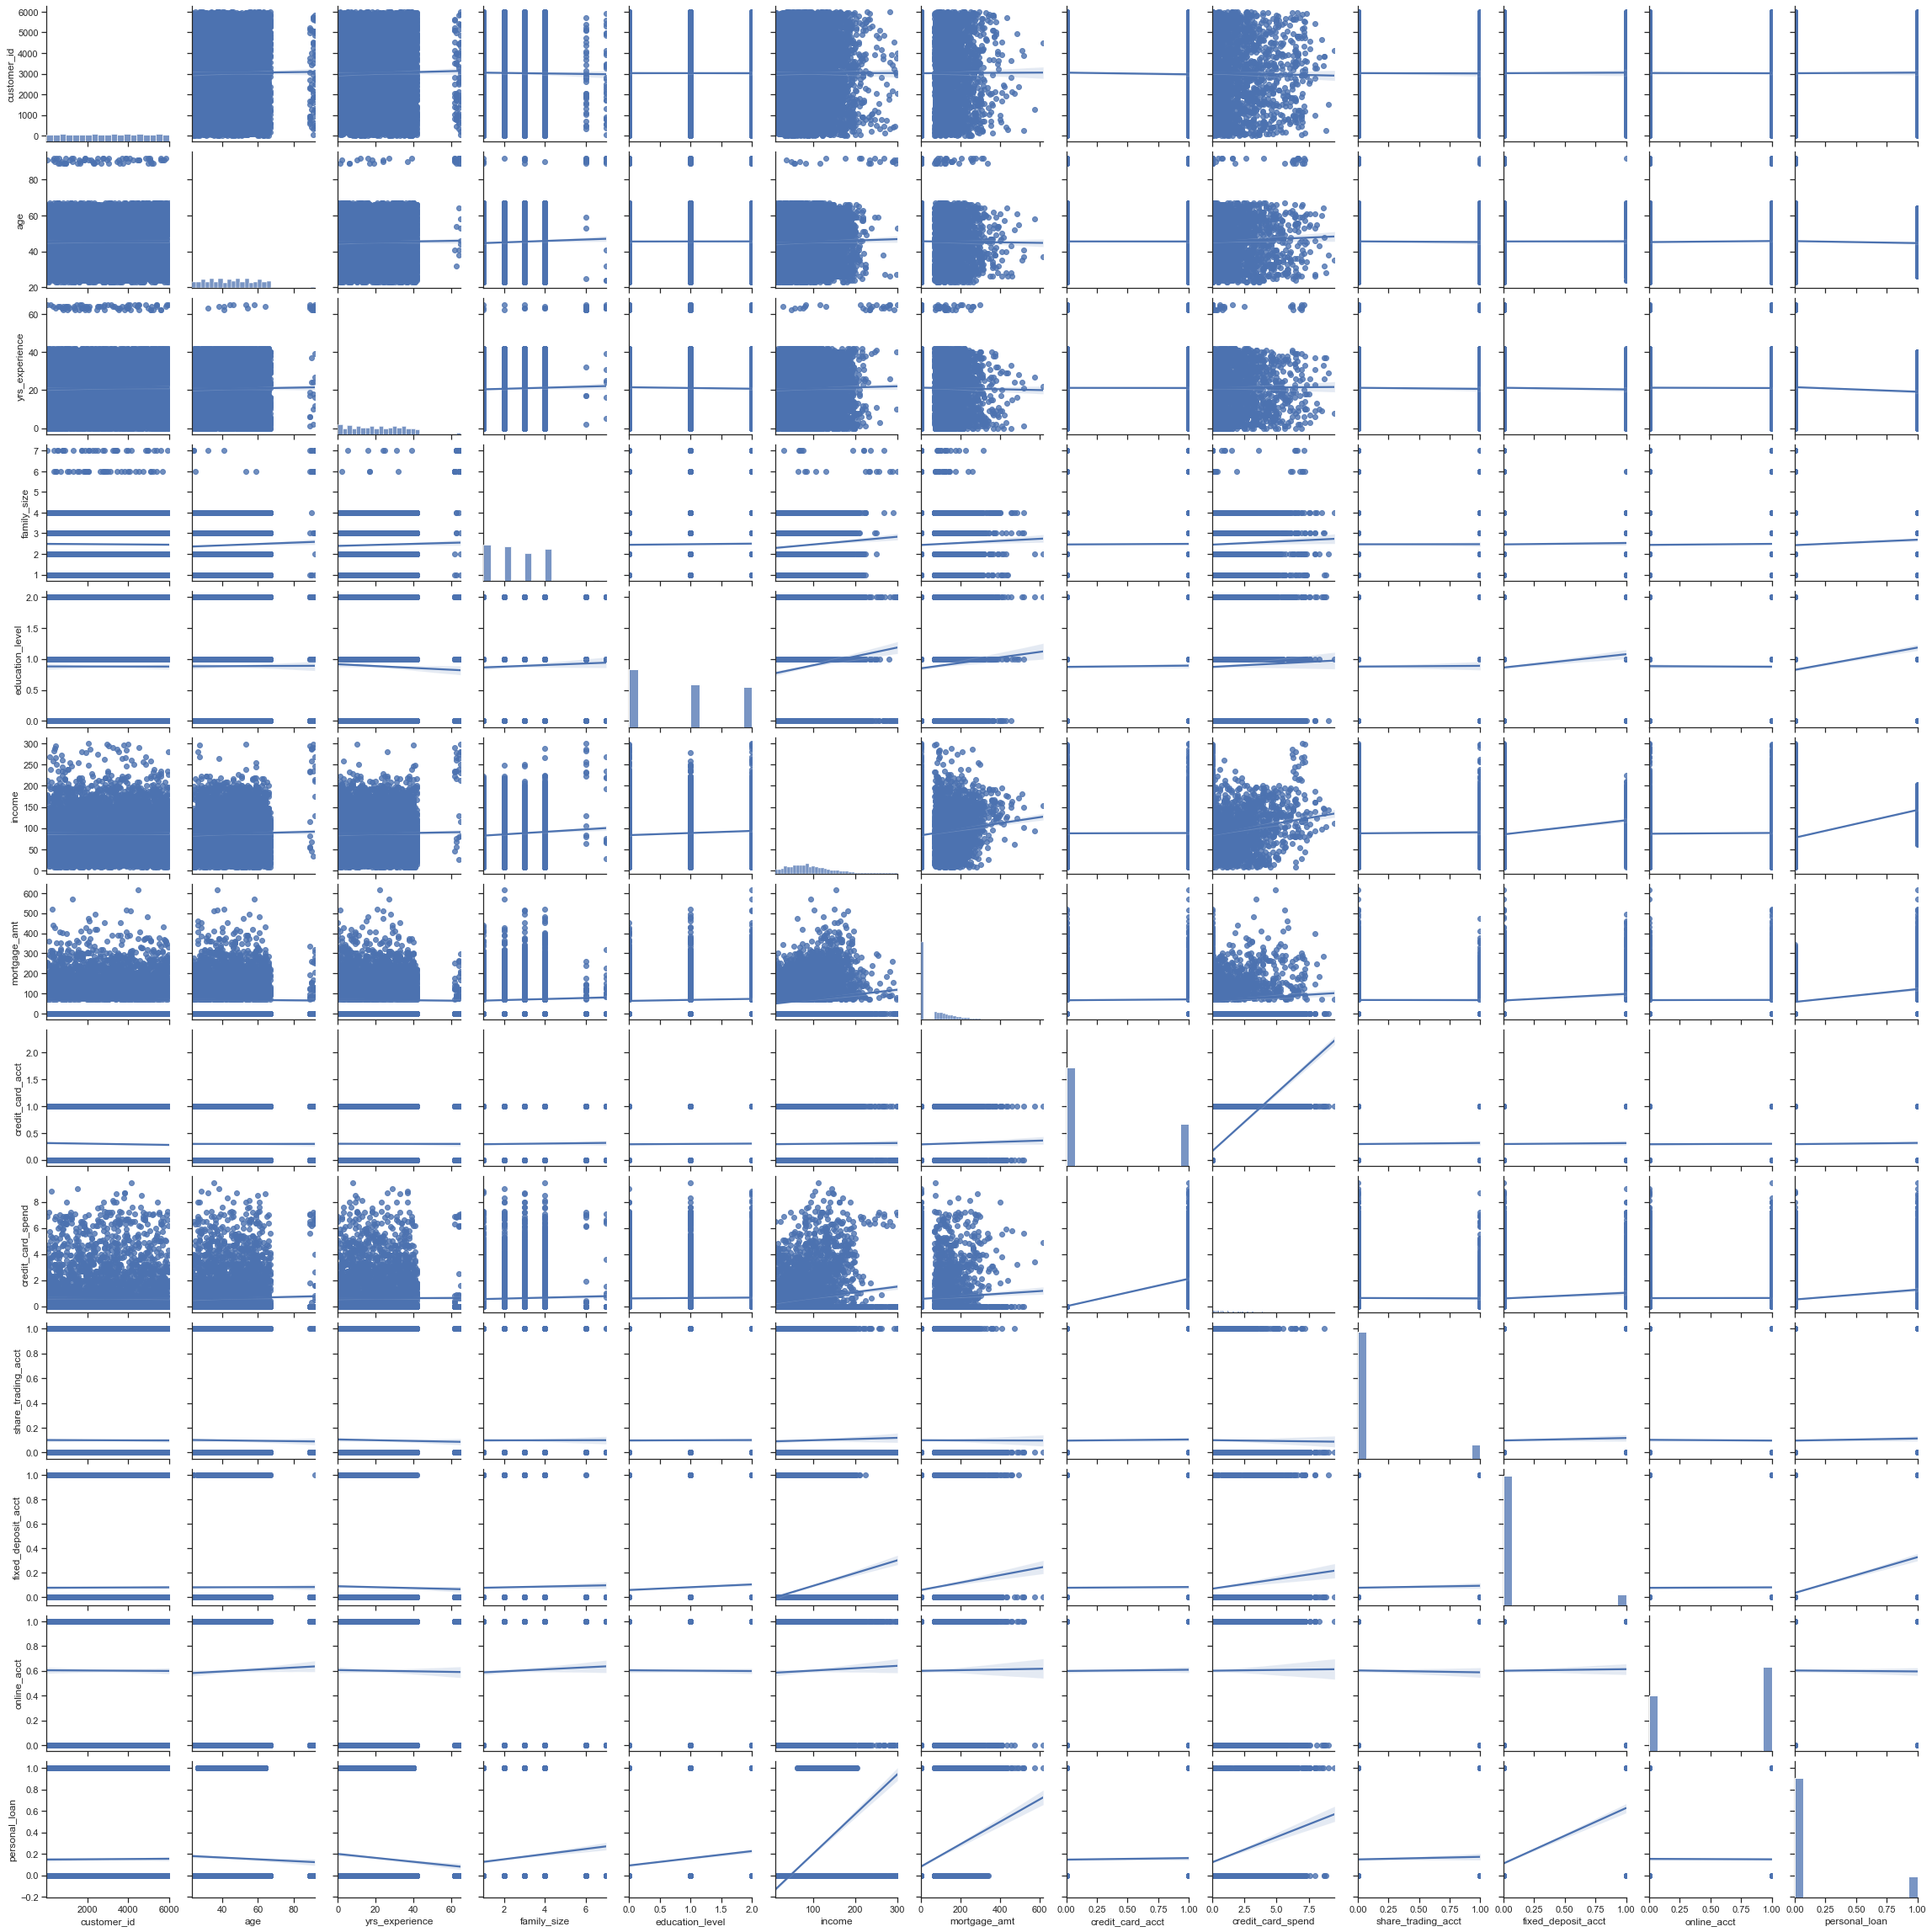

In [46]:
sns.set(style='ticks')
#plt.figure(figsize=(8,16)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
sns.pairplot(loan_df, kind="reg") # kind="reg" means plot the regression line as well

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('correlation-pairplot.png', dpi=300) # dpi=300 is print quality

***Method 3. use Seaborn's heatmap() function***


Text(0.5, 1.0, 'Correlation between features')

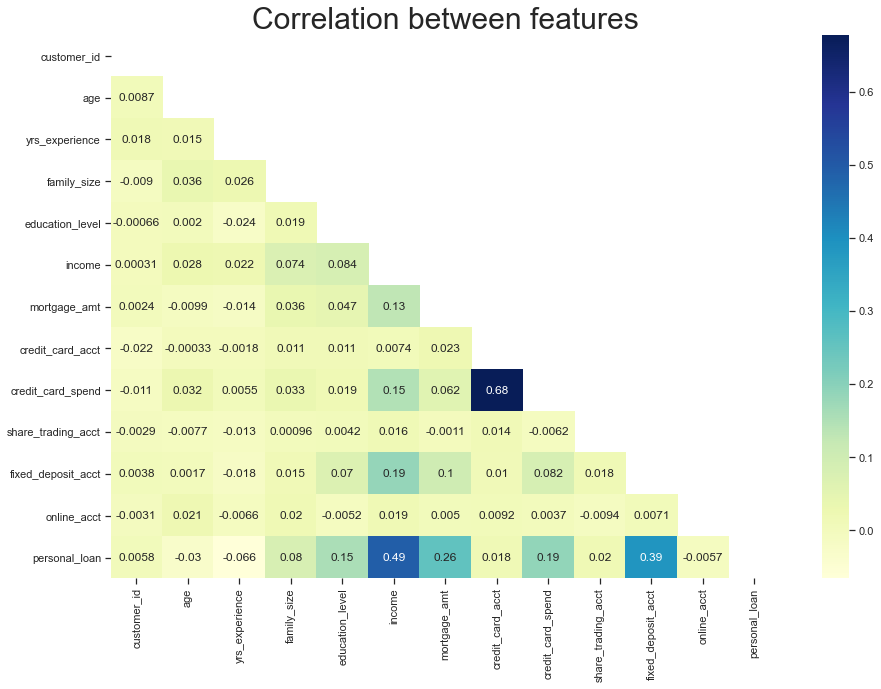

In [47]:
# Triangular shape of the matrix was used to avoid repeated outcome.
matrix = np.triu(loan_df.corr())
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(loan_df.corr(), annot=True, mask=matrix,  cmap="YlGnBu")
plt.title('Correlation between features', fontsize = 30)

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('correlation-heatmap-traingular.png', dpi=300) # dpi=300 is print quality

# 3. Visualization

> ***Result***
> - Many of visualization techniques will not work with the null value -> data cleaning must be preceded. 
> - Since you want to explore the data as it is, you don't want to manipulate the data and the only choice that you have is to delete the rows with null values.
> - All the suspecting missing values are encoded as NaN

## 3.1. Handle missing values

### 3.1.1. Overview of Missing values

> ***Result***
> - There seems to 4 features are containing NaN values. 
> - 509 rows got dropped. 

In [48]:
# Count of missing values in the whole dataframe by column
loan_df.isnull().sum()

customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64

In [49]:
# Drop missing values
loan_df_wo_m = loan_df.dropna() # loan_df_wo_m: loan_df without missing values
print(f'\t - {len(loan_df)-len(loan_df_wo_m)} rows got dropped!')
loan_df_wo_m

	 - 590 rows got dropped!


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,542,60.0,0.0,3.0,0,178.0,78,0,0.0,0,0,0,0
5995,5440,36.0,4.0,1.0,0,72.0,0,0,0.0,0,0,1,0
5996,1251,56.0,25.0,2.0,0,110.0,0,0,0.0,0,0,0,0
5997,2454,34.0,11.0,2.0,1,57.0,0,0,0.0,1,0,1,0


### 3.1.2. Pie chart of personal_loan

> ***Result***
> - The chart shows the % of people took a loan last year

labels: ['No', 'Yes']
values: [4510, 900]


Text(0.5, 1.0, 'Proportion of people took a loan last year')

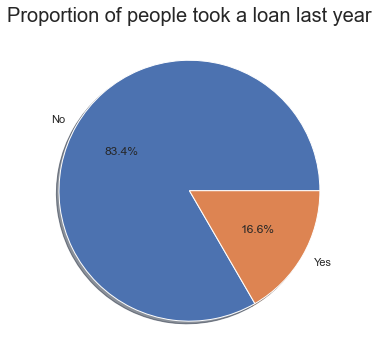

In [50]:
# Plot a pie chart
labels = ["No", "Yes"]
print(f"labels: {labels}")

# Get the values from the "outcome" column - use values to get the values
values = loan_df_wo_m["personal_loan"].value_counts().values.tolist()
print(f"values: {values}")

# Use matplotlib to draw a simple pie chart
plt.figure(figsize=(6,6)) #figsize(width, height) in inches - default(6.4, 4.8) - customise as required
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Proportion of people took a loan last year", fontsize=20) # use fontsize=20 if title is too small

# plt.show() # Do not use this is you want to save to file - the file will be empty

# # Save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('proportion-personal_loan.png', dpi=300)

## 3.2. Visualization of Variables

> - We only conducted visualization on the pairs of highly correlated features identified on section 2.6 Correlations. 
> - that are...
> - 'personal_loan' with 'income'
> - 'personal_loan' with 'fixed_deposit_acct'
> - 'personal_loan' with 'mortgate_amt'
> - 'credit_card_spend' with 'credit_cart_acct'

### 3.2.1 Data preparation

> Split the data into no-loan-taker and loan-taker

In [51]:
# No-loan-taker
no_loan_taker_df = loan_df_wo_m[loan_df_wo_m["personal_loan"]==0]
no_loan_taker_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,2,60.0,0,1,1.7,0,0,1,0
1,5737,65.0,27.0,4.0,1,36.0,90,0,0.0,0,0,1,0
3,4734,29.0,14.0,1.0,0,52.0,0,0,0.0,1,0,1,0
4,2551,43.0,23.0,4.0,2,33.0,0,0,0.0,0,0,1,0
5,4491,44.0,18.0,3.0,1,49.0,0,0,0.0,0,0,1,0


In [52]:
# Loan-taker
loan_taker_df = loan_df_wo_m[loan_df_wo_m["personal_loan"]==1]
loan_taker_df.head()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
2,4209,61.0,3.0,2.0,0,145.0,314,0,0.0,0,1,1,1
12,2179,64.0,13.0,2.0,2,175.0,0,0,0.0,0,1,0,1
20,3181,31.0,11.0,2.0,2,182.0,262,1,4.7,1,0,1,1
21,2330,29.0,31.0,2.0,2,144.0,96,0,0.0,0,0,1,1
25,1591,45.0,19.0,1.0,2,143.0,291,0,0.0,0,1,1,1


### 3.2.2 Visualization of continuous variables

#### A. Impact of "income" on taking a loan

> ***Result***

> Histogram

> - lower the income, the more likely to take the loan
> - both distrubition looks close more or less to normal distribution
> - For loan-taker, the distribution is shifted to the right

> Regression Plot
> - there seems to have positive relationship btw personal_loan and income. The more income -> the more likely to take a loan
> - Income would be a good variable to predict as potential loan taker

Text(0, 0.5, 'Density')

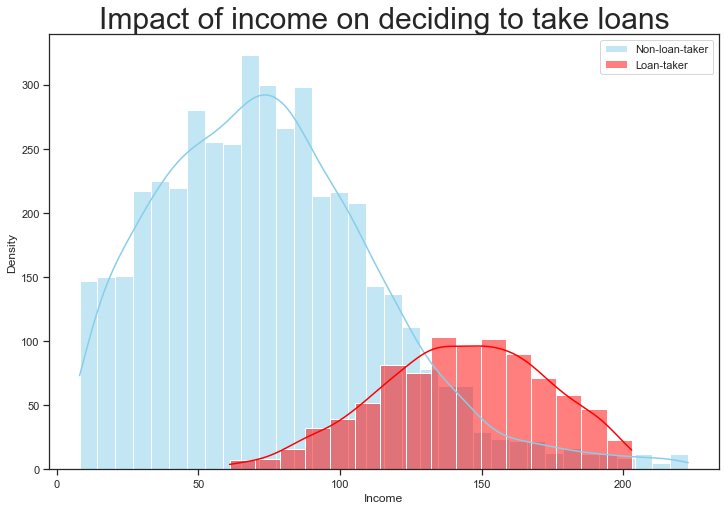

In [53]:
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with density on y-xis (kde=True)
sns.histplot(data=no_loan_taker_df, x="income", color="skyblue", label="Non-loan-taker", kde=True)
sns.histplot(data=loan_taker_df, x="income", color="red", label="Loan-taker", kde=True)

plt.legend()
plt.title('Impact of income on deciding to take loans', fontsize = 30)
plt.xlabel("Income")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-personal_loan.png', dpi=300) # dpi=300 is print quality

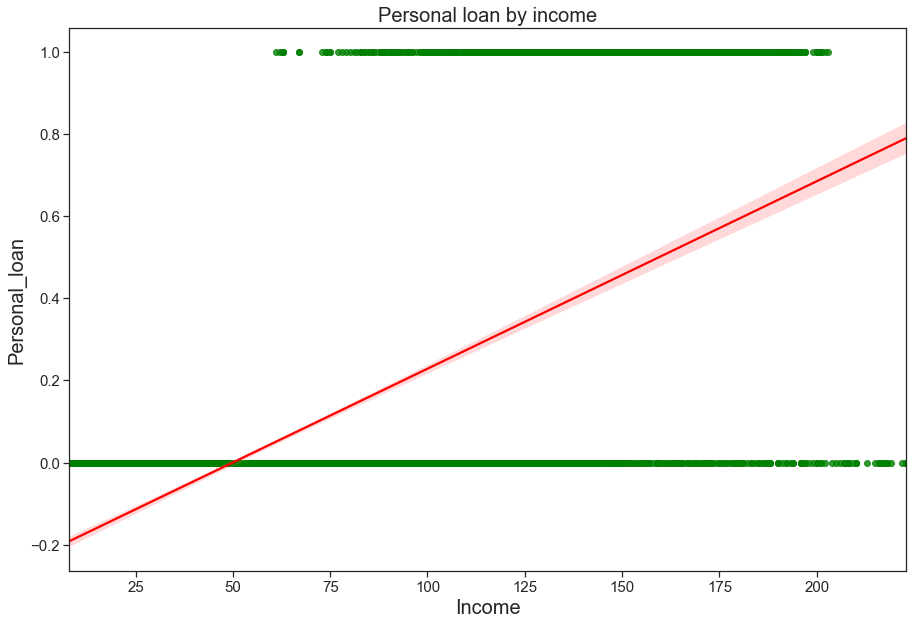

In [54]:
# Regression plot := Scatter plot + Regression line

sns.regplot(x="income", y="personal_loan", data=loan_df_wo_m, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Personal loan by income', fontsize = 20)
plt.xlabel("Income", fontsize=20)
plt.ylabel("Personal_loan", fontsize=20)
plt.tick_params(axis='both', which='both', labelsize=15) # x/y axes, minor/major ticks for plt

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('scatterplot-income-personal_loan.png', dpi=300) # dpi=300 is print quality

#### B. Impact of "mortgage_amt" on taking a loan

> ***Result***

> - As can be seen from the graph below, the number of values with 0 accounts for a majority of records that makes it hard to detect the trends. 
> - Therefore, another graph without the value of 0 was further displayed later in this section.


Text(0, 0.5, 'Density')

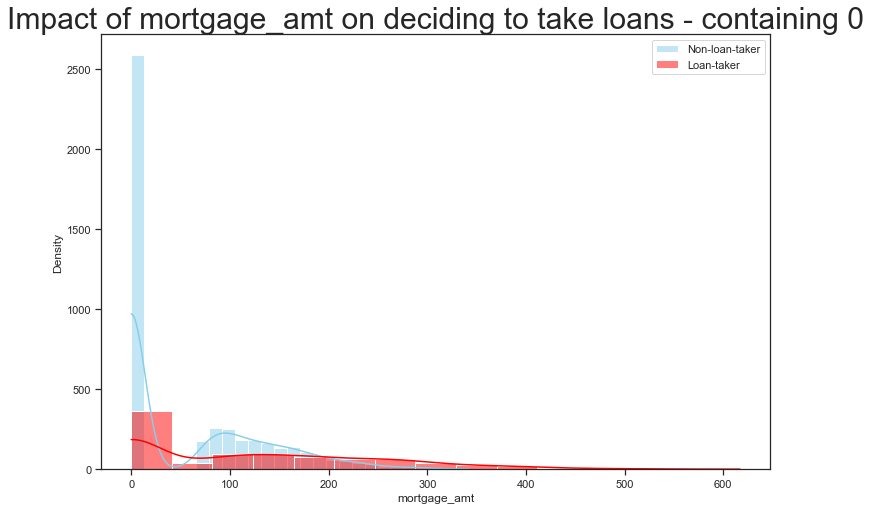

In [55]:
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with density on y-xis (kde=True)
sns.histplot(data=no_loan_taker_df, x="mortgage_amt", color="skyblue", label="Non-loan-taker", kde=True)
sns.histplot(data=loan_taker_df, x="mortgage_amt", color="red", label="Loan-taker", kde=True)

plt.legend()
plt.title('Impact of mortgage_amt on deciding to take loans - containing 0', fontsize = 30)
plt.xlabel("mortgage_amt")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-personal_loan.png', dpi=300) # dpi=300 is print quality

> ***Result***

> Histogram
> - Histogram is to show only the people who took a mortgate.
> - People seem to be uniformly distributed, so the mortgate_amt itself does not seem to matter by itself. 
> - A group of people who didn't take the mortgate is significantly greater than the group of people who took the mortgage.


> Regression Plot
> - there seems to have negative relationship btw personal_loan and income. The more mortgate, the more likely to take a loan

Text(0, 0.5, 'Density')

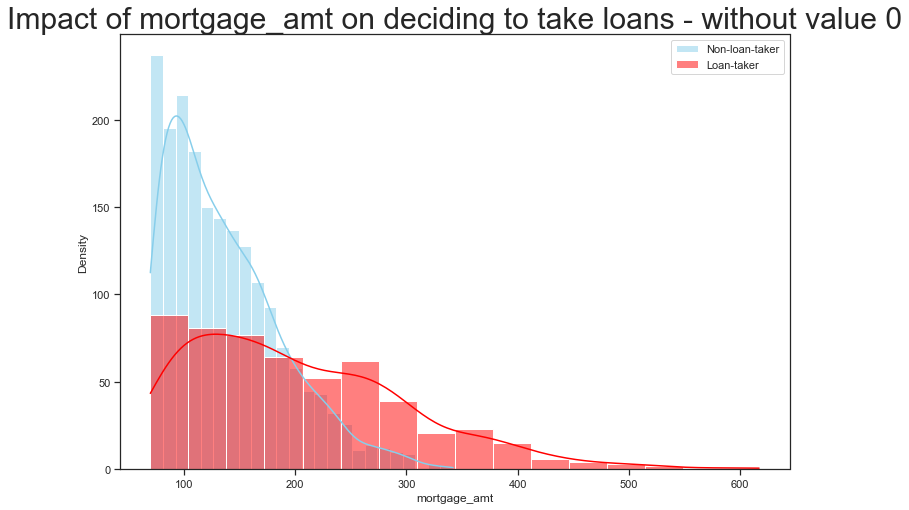

In [56]:
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with density on y-xis (kde=True)
sns.histplot(data=no_loan_taker_df[no_loan_taker_df.mortgage_amt!=0], x="mortgage_amt", color="skyblue", label="Non-loan-taker", kde=True)
sns.histplot(data=loan_taker_df[loan_taker_df.mortgage_amt!=0], x="mortgage_amt", color="red", label="Loan-taker", kde=True)

plt.legend()
plt.title('Impact of mortgage_amt on deciding to take loans - without value 0', fontsize = 30)
plt.xlabel("mortgage_amt")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-personal_loan.png', dpi=300) # dpi=300 is print quality

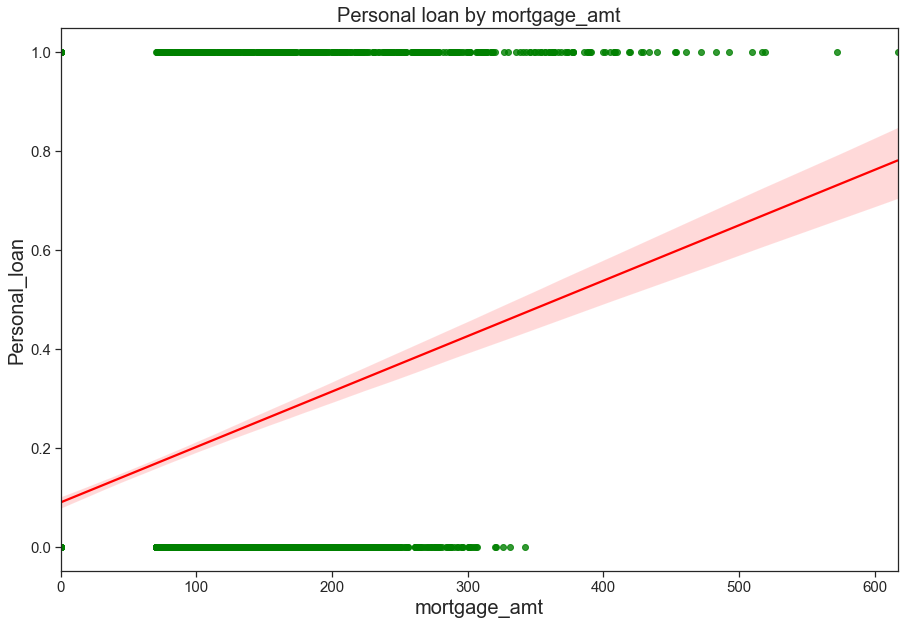

In [57]:
# Regression plot := Scatter plot + Regression line

sns.regplot(x="mortgage_amt", y="personal_loan", data=loan_df_wo_m, 
            scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.rcParams['figure.figsize'] = (15, 10)
plt.title('Personal loan by mortgage_amt', fontsize = 20)
plt.xlabel("mortgage_amt", fontsize=20)
plt.ylabel("Personal_loan", fontsize=20)
plt.tick_params(axis='both', which='both', labelsize=15) # x/y axes, minor/major ticks for plt

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('scatterplot-income-personal_loan.png', dpi=300) # dpi=300 is print quality

#### C. Impact of "age" on taking a loan

- Apart from finding out the relationshi with loan, it is visualized to see if it's normally distributed. 
- 'Age' turned out to be relatively normally distributed.
- Will not be converted to discrete variable in modeling process. 


Text(0, 0.5, 'Density')

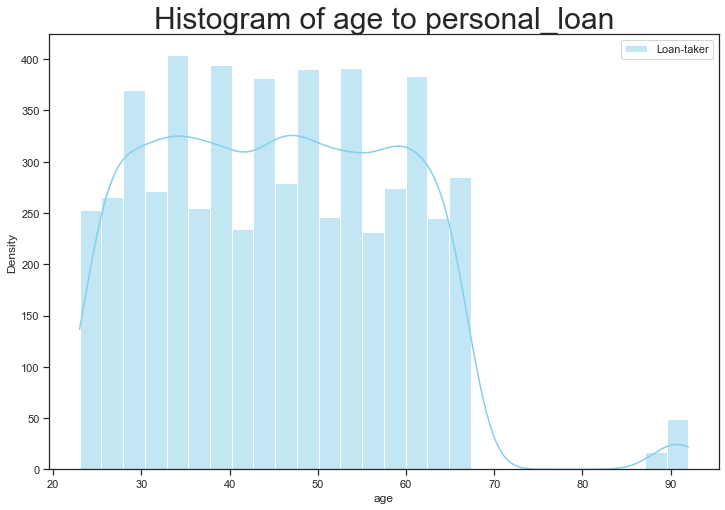

In [58]:
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with density on y-xis (kde=True)
sns.histplot(data=loan_df, x="age", color="skyblue", label="Loan-taker", kde=True)

plt.legend()
plt.title('Histogram of age to personal_loan', fontsize = 30)
plt.xlabel("age")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-personal_loan.png', dpi=300) # dpi=300 is print quality

#### D. Impact of  "yrs_experience"  on taking a loan

- Apart from finding out the relationshi with loan, it is visualized to see if it's normally distributed. 
- 'yrs_experience' turned out to be relatively normally distributed.
- Will not be converted to discrete variable in modeling process. 

Text(0, 0.5, 'Density')

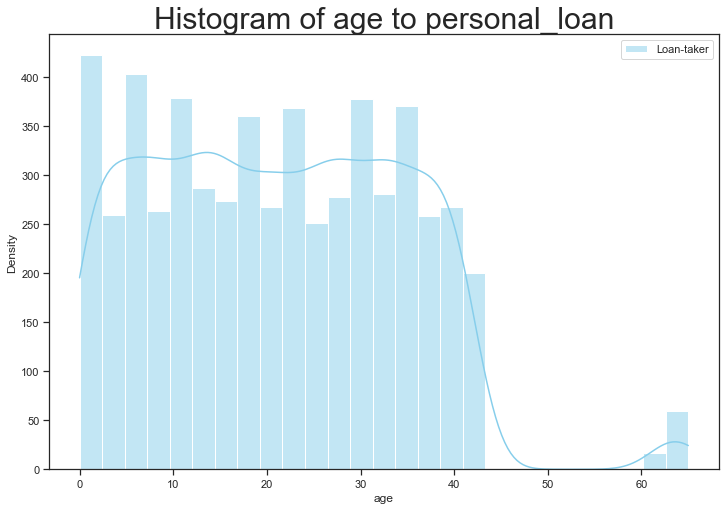

In [59]:
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with density on y-xis (kde=True)
sns.histplot(data=loan_df, x="yrs_experience", color="skyblue", label="Loan-taker", kde=True)

plt.legend()
plt.title('Histogram of age to personal_loan', fontsize = 30)
plt.xlabel("age")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-personal_loan.png', dpi=300) # dpi=300 is print quality

#### E. Impact of  "credit_card_spend" on taking a loan
- Apart from finding out the relationshi with loan, it is visualized to see if it's normally distributed. 
- 'credit_card_spend' turned out to be not normally distributed.
- Will be converted to discrete variable in modeling process. 

Text(0, 0.5, 'Density')

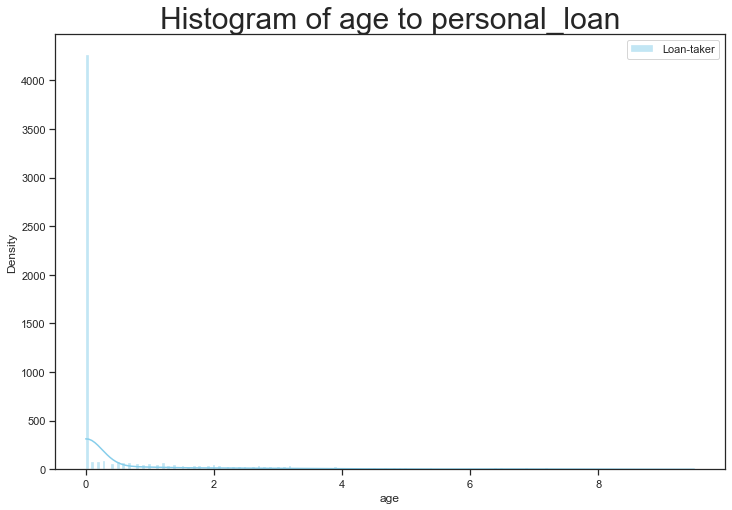

In [60]:
plt.figure(figsize=(12,8)) # figsize(width, height) in inches - default(6.4, 4.8)

# Histogram with density on y-xis (kde=True)
sns.histplot(data=loan_df, x="credit_card_spend", color="skyblue", label="Loan-taker", kde=True)

plt.legend()
plt.title('Histogram of age to personal_loan', fontsize = 30)
plt.xlabel("age")
plt.ylabel("Density")

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('glucose-personal_loan.png', dpi=300) # dpi=300 is print quality

### 4.2.3 Visualization of categorical variables

#### B. Impact of "fixed_deposit_acct" on taking a loan

> ***Result***
> - A group of people who doesn't have a fixed deposit account is more unlikely to take the personal loan. 
> - Looking at the people who took a loan, there do not seem to be a remarkable difference between 2 categories, except for the fact that people without fixed deposit account is slightly more likely to take loan than people with fixed deposit account.
> - Cannot tell for sure that fixed deposit account will be a good predictor of being potential loan-taker. 

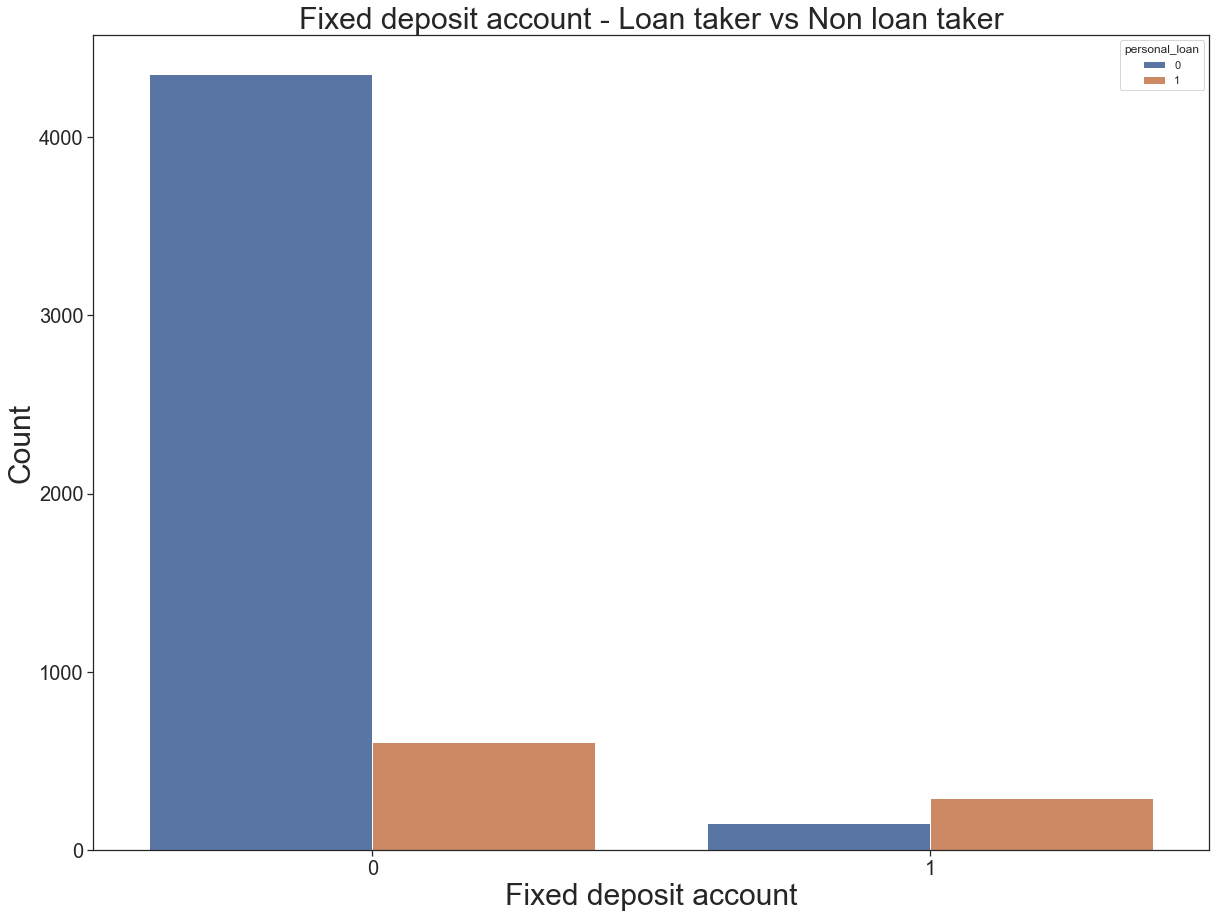

In [64]:
# Plot the charts using Seaborn's countplot()

# As a single plot
sns.countplot(x='fixed_deposit_acct', 
              data=loan_df_wo_m, # Whole dataset (non loan taker + loan taker)
              hue='personal_loan') # grouped by outcome

# Adjust the font sizes
plt.rcParams['figure.figsize'] = (20, 15)
plt.title('Fixed deposit account - Loan taker vs Non loan taker', fontsize=30)
plt.xlabel("Fixed deposit account", fontsize=30)
plt.ylabel("Count", fontsize=30)
plt.tick_params(axis='both', which='both', labelsize=20) # x/y axes, minor/major ticks for plt

# # If you want to save the graph to disk
# plt.tight_layout() # automatically adjusts subplot to fit in the figure area
# plt.savefig('fixed_deposit_acct_category-single.png', dpi=300) # dpi=300 is print quality
